## Data analysis

In [ ]:
from utils import *
import torch
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [3]:
def show_images(data, n_samples):

    plt.figure(figsize=(8,2))

    for i in range(n_samples):
        image = data[i][0].reshape(8, 8)
        plt.subplot(1,n_samples,i+1)
        plt.axis('off')
        plt.imshow(image.numpy(), cmap='gray')
        
    plt.show()

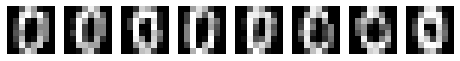

In [10]:
# Showing real data

digits = datasets.load_digits()

x_train = digits.data
y_train = digits.target

x_train = x_train.reshape(len(x_train), 8, 8)
x_train.shape

rd, real_data = resize_data(x_train, y_train, label = (0,), image_size = 8)
show_images(rd, 8)

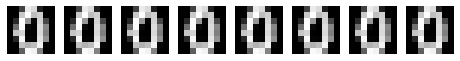

(None, torch.Size([1, 8, 8]))

In [5]:
# Making inference with classical GAN

model = torch.load('torch_results/GAN/GAN_linear/20221216-184000/gen_epoch_500')   # '0' features
#model = torch.load('torch_results/GAN/GAN_linear/20221219-092917/gen_epoch_1500') # '0','1' features
#model = torch.load('torch_results/GAN/GAN_linear/20221219-100153/gen_epoch_2000')  # '0','1','2' features
model.eval()

GAN_imgs = []

fixed_noise = torch.rand(1, 5) 
for i in range(len(real_data)):      
     
    image = model(fixed_noise).view(1,8,8).cpu().detach()
    GAN_imgs.append(image)

show_images(GAN_imgs, 8), GAN_imgs[0].shape

In [6]:
synthetic = torch.load('torch_results/GAN/GAN_linear/20221219-100153/synthetic.pt')
#generated_images(synthetic)

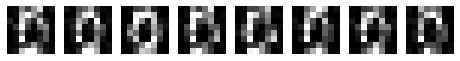

In [7]:
# Making inference with QGAN

q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-184033/q_gen_epoch_500')  # '0' features 6 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221219-093229/q_gen_epoch_1500')  # '0','1' features 6 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-125209/q_gen_epoch_1000')  # '0','1' features 8 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-150017/q_gen_epoch_2000')  # '0','1' features 10 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-112234/q_gen_epoch_2000')  # '0','1','2' features
q_model.eval()

QGAN_imgs = []
for i in range(len(real_data)):      
    fixed_noise = torch.rand(1, 5)  
    q_image = q_model(fixed_noise).view(1,8,8).cpu().detach()
    QGAN_imgs.append(q_image)

show_images(QGAN_imgs, 8)

In [8]:
q_synthetic = torch.load('torch_results/QGAN/QGAN_linear/20221219-093229/synthetic.pt')  
#generated_images(q_synthetic)

/tmp/ipykernel_1050/2070859375.py:12: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df1, df2, df3], 1)


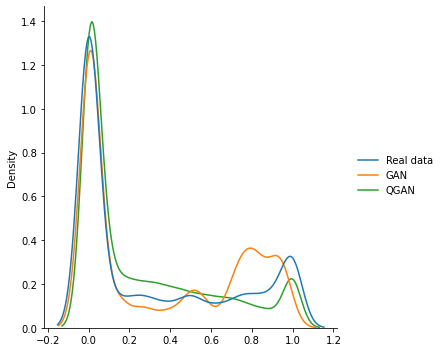

In [9]:
# Plotting histogram probability distributions 

linear_gan_synthetic = np.concatenate(GAN_imgs).reshape(360, 8, 8)
reshaped_linear_gan_synthetic = linear_gan_synthetic.reshape(360*64)
linear_qgan_synthetic = np.concatenate(QGAN_imgs).reshape(360, 8, 8)
reshaped_linear_qgan_synthetic = linear_qgan_synthetic.reshape(360*64)
real_data = np.concatenate(real_data).reshape(360, 8, 8)
reshaped_real_data = real_data.reshape(360*64)

empty_dataframe = pd.DataFrame(columns=['Real data','GAN', 'QGAN'])
df1 = pd.DataFrame(reshaped_real_data)
df2 = pd.DataFrame(reshaped_linear_gan_synthetic)
df3 = pd.DataFrame(reshaped_linear_qgan_synthetic)
df = pd.concat([df1, df2, df3], 1)
df.columns = ['Real data','GAN', 'QGAN']

sns.displot(data = df, kind = 'kde')